## Day 29 Lecture 1 Assignment

In this assignment, we will learn about decision trees. We will use the Chicago salary dataset loaded below.

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz

from sklearn.model_selection import train_test_split
from sklearn import tree

In [19]:
chicago = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Current_Employee_Names__Salaries__and_Position_Titles.csv')

In [20]:
chicago.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN
2,"COOPER, JOHN E",LIEUTENANT-EMT,FIRE,F,Salary,NaN,$114324.00,NaN
3,"CRESPO, VILMA I",STAFF ASST,LAW,F,Salary,NaN,$76932.00,NaN
4,"DOLAN, ROBERT J",SERGEANT,POLICE,F,Salary,NaN,$111474.00,NaN


To simplify this problem, we will limit our model to only salary employees. Create a new dataset that does not contain any hourly employees.

In [21]:
# answer below:
chicago_sal = chicago.loc[chicago['Salary or Hourly']=='Salary']
chicago_sal.shape

(24775, 8)

Next, we will look at the count of all values for both job titles and department to ensure that we don't use features that are too sparse in our model.

In [22]:
# answer below:
chicago_sal['Job Titles'].value_counts()

POLICE OFFICER                            9393
FIREFIGHTER-EMT                           1424
SERGEANT                                  1118
POLICE OFFICER (ASSIGNED AS DETECTIVE)     845
FIREFIGHTER                                564
                                          ... 
DIR OF CAPS                                  1
CHIEF INFORMATION OFFICER                    1
AVIATION SAFETY DIR                          1
PHOTOGRAPHER                                 1
SUPVSR OF COST CONTROL                       1
Name: Job Titles, Length: 954, dtype: int64

In [23]:
chicago_sal['Department'].value_counts()

POLICE                   12941
FIRE                      4798
OEMC                       832
PUBLIC LIBRARY             708
AVIATION                   556
FINANCE                    532
HEALTH                     512
TRANSPORTN                 396
WATER MGMNT                366
LAW                        361
CITY COUNCIL               348
STREETS & SAN              321
FAMILY & SUPPORT           321
BUILDINGS                  266
COMMUNITY DEVELOPMENT      210
GENERAL SERVICES           205
BUSINESS AFFAIRS           160
BOARD OF ELECTION          112
DoIT                       101
PROCUREMENT                 82
CITY CLERK                  82
MAYOR'S OFFICE              78
HUMAN RESOURCES             67
CULTURAL AFFAIRS            66
INSPECTOR GEN               63
ANIMAL CONTRL               57
IPRA                        56
BUDGET & MGMT               43
ADMIN HEARNG                38
DISABILITIES                29
TREASURER                   23
COPA                        17
HUMAN RE

Choose the between department and job title and use the variable with the smallest number of values to for one hot encoding. Additionally, create dummy variables for full ot part-time.

In [24]:
# answer below:
chicago_sal['Job Titles'].nunique()

954

In [25]:
chicago_sal['Department'].nunique()

36

In [26]:
chicago_sal = pd.concat([chicago_sal,
                         pd.get_dummies(chicago_sal['Department'])],
                        axis = 1)

In [ ]:
chicago_sal['Full or Part-Time'].value_counts()

F    24770
P        5
Name: Full or Part-Time, dtype: int64

In [28]:
chicago_sal = pd.concat([chicago_sal,
                         pd.get_dummies(chicago_sal['Full or Part-Time'])],
                        axis = 1)

Remove all irrelevant columns (Name, Job Titles, Salary or Hourly, Typical Hours, Hourly Rate)

In [30]:
# answer below:
chicago_sal.drop(['Name', 'Job Titles', 'Salary or Hourly', 'Typical Hours', 'Hourly Rate', 'Department', 'Full or Part-Time'], axis=1, inplace=True)


In [31]:
chicago_sal.head()

,Annual Salary,ADMIN HEARNG,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BOARD OF ETHICS,BUDGET & MGMT,BUILDINGS,BUSINESS AFFAIRS,CITY CLERK,CITY COUNCIL,COMMUNITY DEVELOPMENT,COPA,CULTURAL AFFAIRS,DISABILITIES,DoIT,FAMILY & SUPPORT,FINANCE,FIRE,GENERAL SERVICES,HEALTH,HUMAN RELATIONS,HUMAN RESOURCES,INSPECTOR GEN,IPRA,LAW,LICENSE APPL COMM,MAYOR'S OFFICE,OEMC,POLICE,POLICE BOARD,PROCUREMENT,PUBLIC LIBRARY,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT,F,P
0,$107790.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,$104628.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,$114324.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,$76932.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,$111474.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


Check that none of the remaining columns are of object type and convert them to numeric if they are of object type.

In [33]:
# answer below:
chicago_sal['Annual Salary'] = pd.to_numeric(chicago_sal['Annual Salary'].str.strip('$'), errors='coerce')
chicago_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24775 entries, 0 to 32657
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Annual Salary          24775 non-null  float64
 1   ADMIN HEARNG           24775 non-null  uint8  
 2   ANIMAL CONTRL          24775 non-null  uint8  
 3   AVIATION               24775 non-null  uint8  
 4   BOARD OF ELECTION      24775 non-null  uint8  
 5   BOARD OF ETHICS        24775 non-null  uint8  
 6   BUDGET & MGMT          24775 non-null  uint8  
 7   BUILDINGS              24775 non-null  uint8  
 8   BUSINESS AFFAIRS       24775 non-null  uint8  
 9   CITY CLERK             24775 non-null  uint8  
 10  CITY COUNCIL           24775 non-null  uint8  
 11  COMMUNITY DEVELOPMENT  24775 non-null  uint8  
 12  COPA                   24775 non-null  uint8  
 13  CULTURAL AFFAIRS       24775 non-null  uint8  
 14  DISABILITIES           24775 non-null  uint8  
 15  Do

Split the data into a test and train sample. Use annual salary as the dependent variable. 20% of the data should be assigned to the test sample.

In [36]:
# answer below:
X = chicago_sal.drop('Annual Salary', axis=1)
Y = chicago_sal['Annual Salary']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Generate a regession decision tree using `DecisionTreeRegressor` in sklearn. Fit the model on the training set and calculate the score for both train and test.

In [67]:
# answer below:
decision_tree = tree.DecisionTreeRegressor(max_depth=10)

decision_tree.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

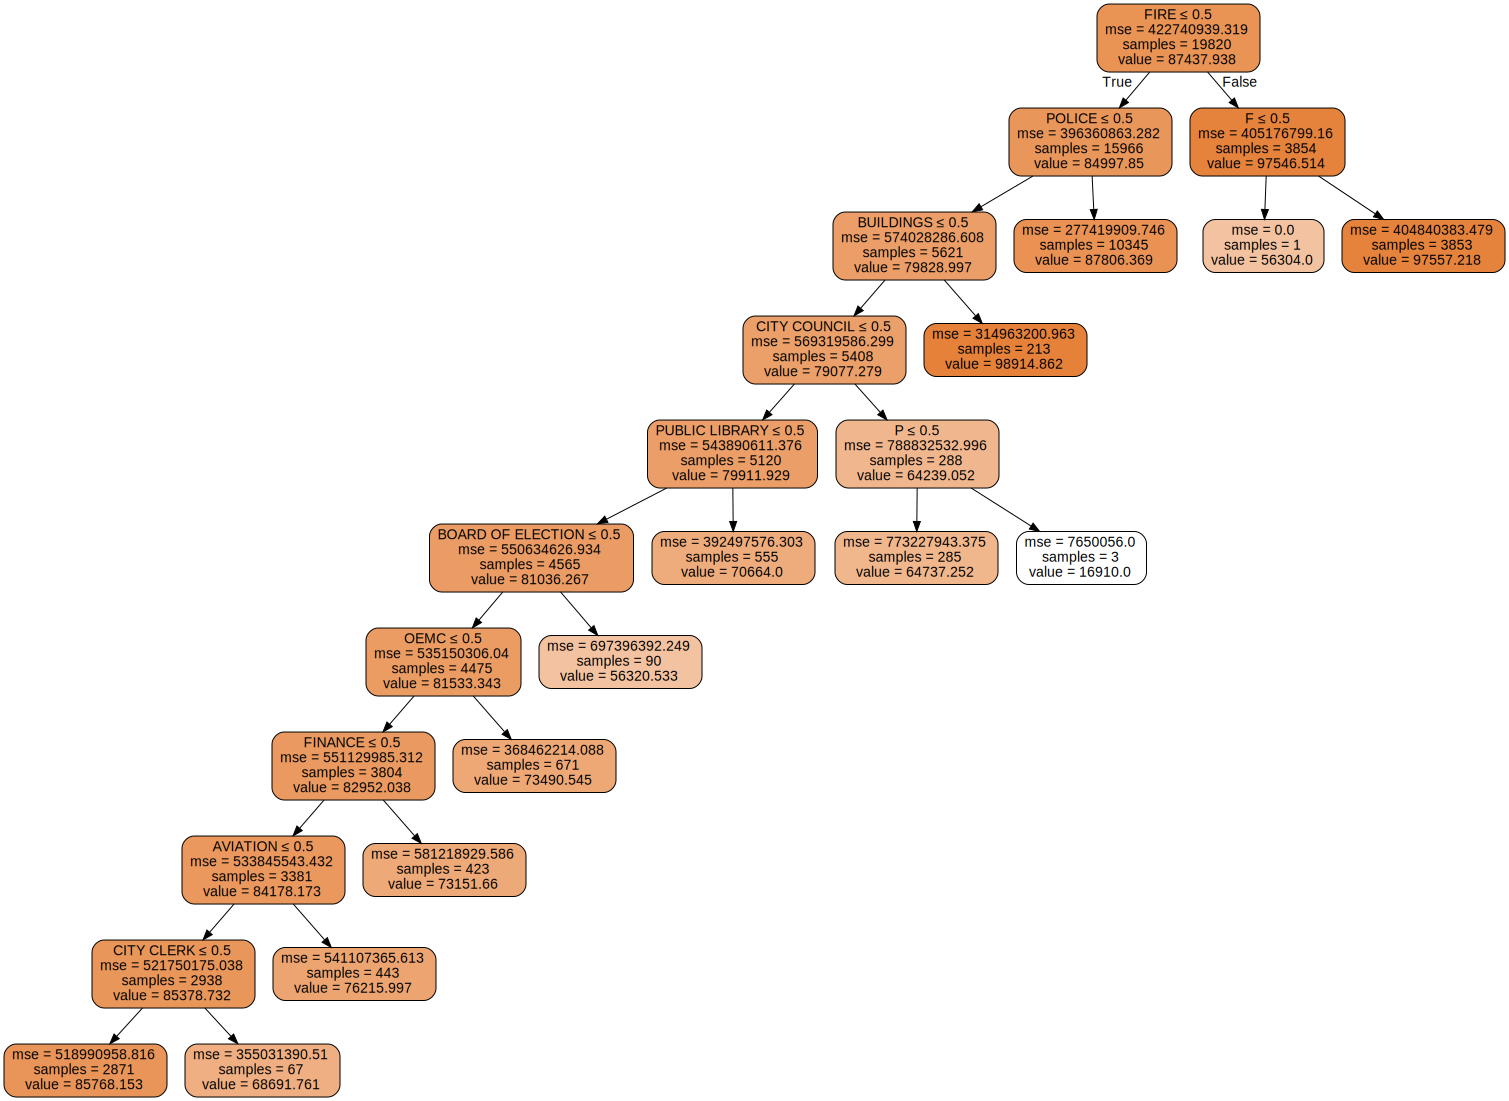

In [68]:
dot_data = tree.export_graphviz(
    decision_tree, 
    out_file=None, 
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data)
graph

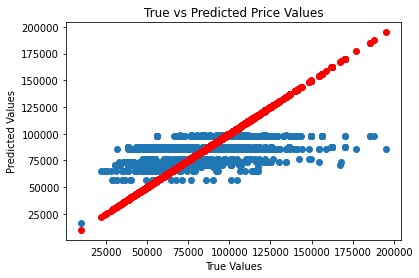

In [69]:
y_preds = decision_tree.predict(X_test)

plt.scatter(y_test, y_preds)
plt.scatter(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Price Values')
plt.show()